In [1]:
%cd ..

/home/cole/Documents/dl-final-project


In [2]:
import torch
from PIL import Image
from model.resnet import Prototype
from data import get_labeled_set, get_unlabeled_set, make_bounding_box_images, tensor_to_image

import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = Prototype('cpu')
# model.device = 'cpu'
# model.is_variational = True

file_path = '/home/cole/labeled-roadmap-resnet-latest.torch.dl'
model.load_state_dict(torch.load(file_path, 
                                 map_location=torch.device('cpu')))
model = model.eval()

In [4]:
# _, unlabeled_trainloader = get_unlabeled_set(batch_size=1)
# images, _ = iter(unlabeled_trainloader).next()

In [5]:
# img = images[0]
# img_recon, _, _ = model(img[None, ...], 'single-image')

In [6]:
# plt.imshow(img.numpy().transpose(1, 2, 0))
# plt.axis('off');

In [7]:
# plt.imshow(img_recon[0].detach().numpy().transpose(1, 2, 0))
# plt.axis('off');

In [22]:
(_, labeled_trainloader), (_, labeled_testloader) = get_labeled_set(batch_size=2, validation=0.2)

==> Validation Index: 128


In [23]:
images, targets, road_map = iter(labeled_testloader).next()
images = torch.stack(images)
images.shape

torch.Size([2, 6, 3, 256, 306])

In [34]:
targets[0]

{'bounding_box': tensor([[[ 27.5429,  29.3744,  28.7489,  30.5803],
          [-22.0395, -21.5867, -26.9166, -26.4638]],
 
         [[ 24.5927,  26.4598,  25.6929,  27.5600],
          [ -8.9134,  -8.4896, -13.7591, -13.3353]],
 
         [[ 31.3144,  31.3906,  37.2130,  37.2892],
          [ 20.5291,  22.8287,  20.3328,  22.6324]],
 
         [[ 12.9069,  14.4922,  11.2163,  12.8015],
          [ 16.5731,  15.8961,  12.6122,  11.9352]],
 
         [[-18.3985, -18.2022, -13.0714, -12.8751],
          [ 35.0982,  37.2161,  34.6035,  36.7214]],
 
         [[-27.5675, -27.5732, -32.2735, -32.2792],
          [  1.6489,  -0.1451,   1.6645,  -0.1295]],
 
         [[-18.9766, -19.0125, -19.8845, -19.9204],
          [ -8.9115,  -9.7016,  -8.8701,  -9.6603]],
 
         [[ 32.8174,  34.5948,  33.8922,  35.6696],
          [-30.7068, -30.2771, -35.1527, -34.7230]],
 
         [[ 25.8359,  27.6347,  26.7883,  28.5872],
          [-15.2500, -14.8416, -19.4452, -19.0369]],
 
         [[ 29.2236, 

In [24]:
objs_map = model.infer_object_heat_map(images)
objs_map.shape

torch.Size([2, 3, 800, 800])

In [25]:
road_recon_map = model.infer_road_map(images)
road_recon_map.shape

torch.Size([2, 1, 800, 800])

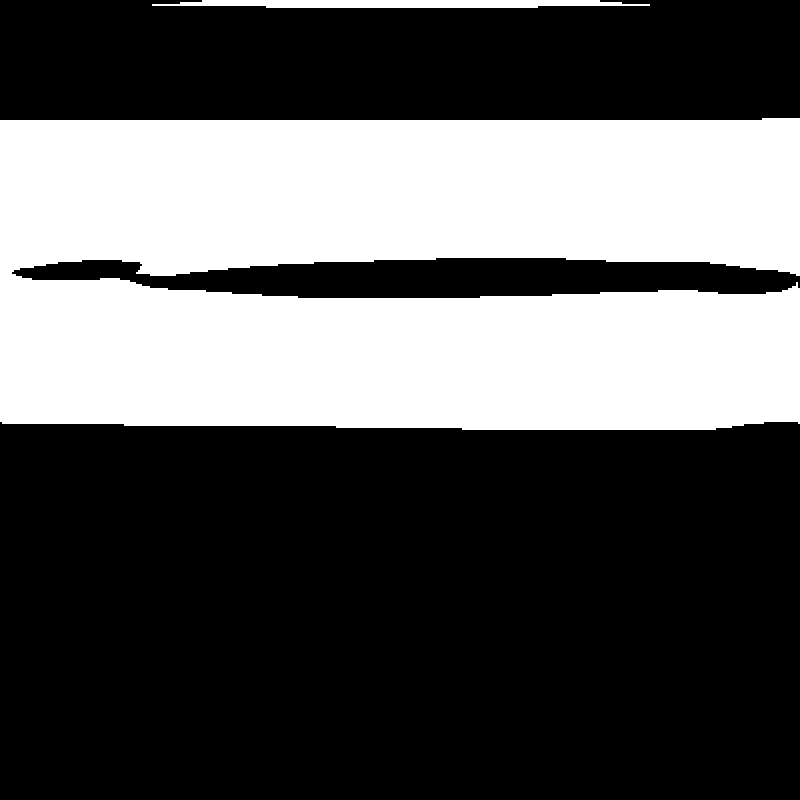

In [26]:
Image.fromarray(road_recon_map[0][0].detach().numpy().astype('bool')).convert('1')

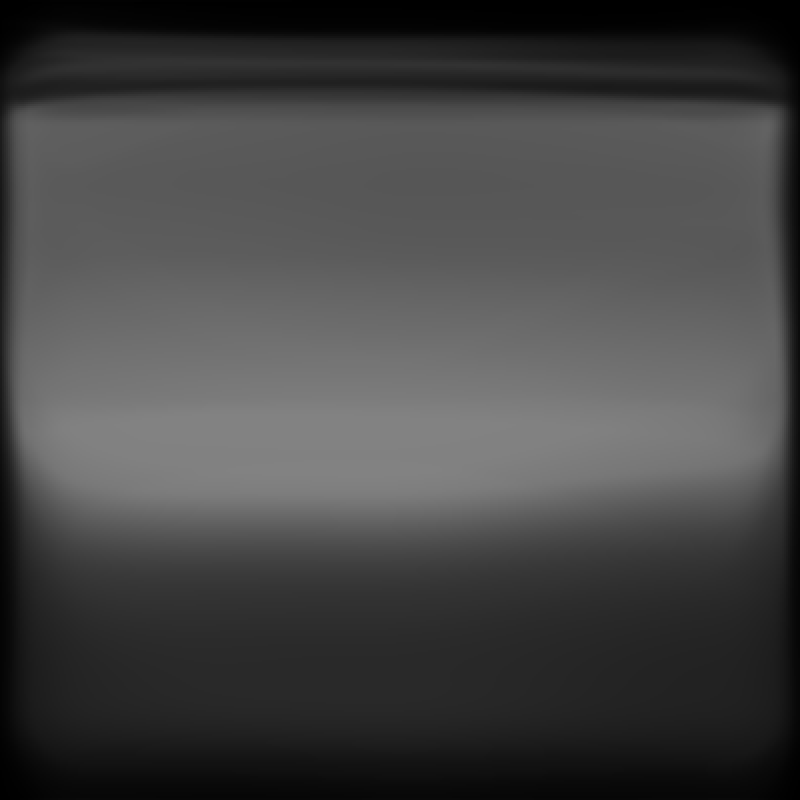

In [27]:
channel = 1
Image.fromarray(objs_map[0][channel].detach().numpy().astype('float') * 255.0).convert('L')

In [28]:
# import matplotlib.pyplot as plt
# from helpers.helper import draw_box
# # The center of image is 400 * 400
# fig, ax = plt.subplots()
# color_list = ['b', 'g', 'orange', 'c', 'm', 'y', 'k', 'w', 'r']
# # ax.imshow(road_image[0], cmap ='binary');
# # The ego car position
# ax.plot(400, 400, 'x', color="red")
# for i, bb in enumerate(targets[0]['bounding_box']):
#     # You can check the implementation of the draw box to understand how it works
#     draw_box(ax, bb, color=color_list[targets[0]['category'][i]])

In [29]:
from model.util import make_object_seg_network_from_backbone

In [30]:
# from torchvision.models.resnet import resnet18
# from torchvision.models.detection.backbone_utils import BackboneWithFPN

# return_layers = {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}
# in_channels_stage2 = model.backbone.inplanes // 8
# in_channels_list = [
#     in_channels_stage2,
#     in_channels_stage2 * 2,
#     in_channels_stage2 * 4,
#     in_channels_stage2 * 8,
# ]
# out_channels = 256

# bb = BackboneWithFPN(model.backbone, return_layers, in_channels_list, out_channels)

In [31]:
osn = make_object_seg_network_from_backbone(model.backbone, 512, 3)

In [32]:
# (_, labeled_trainloader), (_, labeled_testloader) = get_labeled_set(batch_size=1, validation=0.2)
# _, targets, road_map = iter(labeled_testloader).next()
# images = torch.stack(images)
# images.shape

In [36]:
osn.eval()
osn(objs_map)

[{'boxes': tensor([[0.0000e+00, 0.0000e+00, 1.0971e+01, 2.2916e+01],
          [0.0000e+00, 0.0000e+00, 2.2901e+01, 1.1013e+01],
          [0.0000e+00, 2.8200e-02, 1.1046e+01, 2.2889e+01],
          [0.0000e+00, 1.3552e-02, 2.3059e+01, 1.1000e+01]],
         grad_fn=<StackBackward>),
  'labels': tensor([1, 1, 2, 2]),
  'scores': tensor([0.3385, 0.3385, 0.3316, 0.3316], grad_fn=<IndexBackward>)},
 {'boxes': tensor([[0.0000e+00, 0.0000e+00, 1.0974e+01, 2.2915e+01],
          [0.0000e+00, 0.0000e+00, 2.2900e+01, 1.1010e+01],
          [0.0000e+00, 2.6434e-02, 1.1050e+01, 2.2886e+01],
          [0.0000e+00, 1.2701e-02, 2.3059e+01, 1.0996e+01]],
         grad_fn=<StackBackward>),
  'labels': tensor([1, 1, 2, 2]),
  'scores': tensor([0.3386, 0.3386, 0.3316, 0.3316], grad_fn=<IndexBackward>)}]

In [20]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [21]:
f = FastRCNNPredictor(3, 3)
f(objs_map[0])

RuntimeError: size mismatch, m1: [3 x 640000], m2: [3 x 3] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:136